In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_699279.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_902638.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_617871.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_266522.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_470425.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_387936.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_418203.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_461013.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_482763.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_993312.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_795851.jpg
/kaggle/input/blood-cells-image-dataset/bloodcells_dataset/monocyte/MO_358488.jpg
/kaggle/input/bl

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

In [46]:
dataset_path = '/kaggle/input/blood-cells-image-dataset/bloodcells_dataset'
images = []
labels = []

img_size = (64, 64)

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(class_name)

images = np.array(images)
labels = np.array(labels)


In [47]:
print(labels)

['monocyte' 'monocyte' 'monocyte' ... 'platelet' 'platelet' 'platelet']


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_en = le.fit_transform(labels)

n_samples, img_height, img_width, n_channels = images.shape
images_flat = images.reshape(n_samples, img_height * img_width * n_channels)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(images_flat, labels_en, test_size=0.2, random_state=42)

In [50]:
print(X_train[1])

[201 225 253 ... 204 227 254]


In [52]:
print(le.inverse_transform([y_train[1]]))

['basophil']


In [56]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5293945598128108


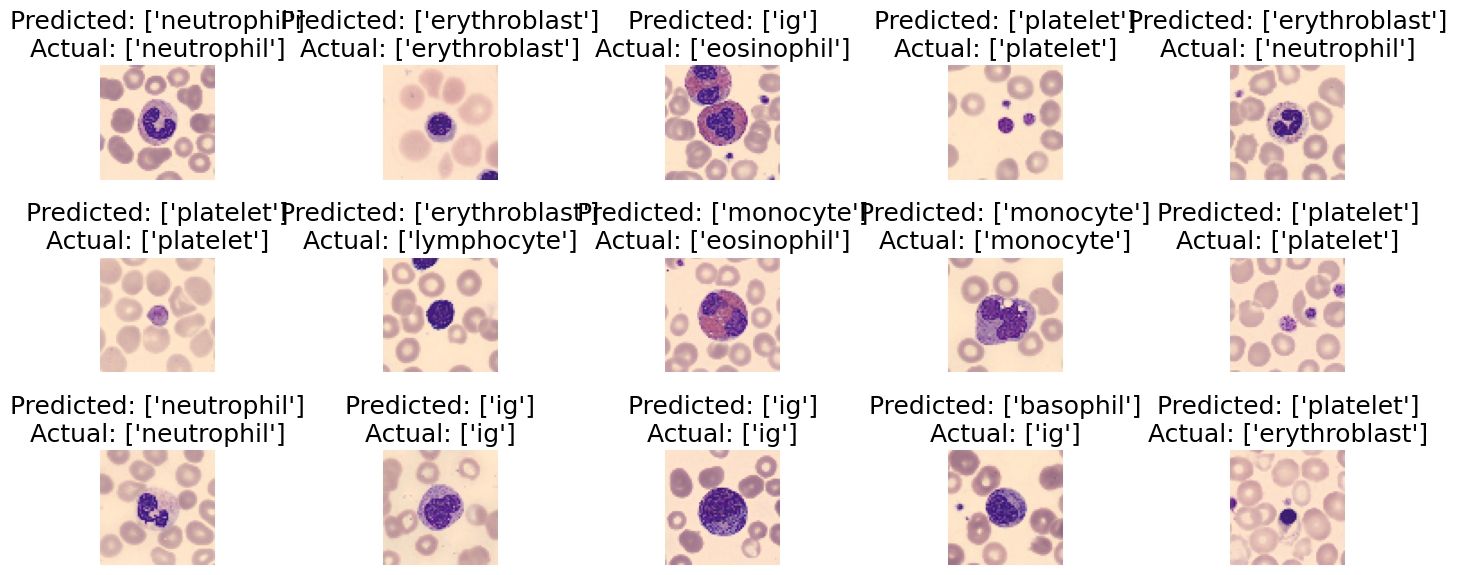

In [89]:
fig, axes = plt.subplots(3, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(15):
    # แปลง X_test[i] กลับไปเป็นภาพ
    image = X_test[i].reshape(img_height, img_width, n_channels)
    
    # แสดงภาพ
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Predicted: {le.inverse_transform([y_pred[i]])}\nActual: {le.inverse_transform([y_test[i]])}')
    axes[i].axis('off')  

plt.tight_layout()
plt.show()

In [78]:
report = classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred))
print(report)


              precision    recall  f1-score   support

    basophil       0.48      0.21      0.29       261
  eosinophil       0.50      0.85      0.63       612
erythroblast       0.29      0.83      0.43       305
          ig       0.61      0.21      0.32       577
  lymphocyte       0.63      0.36      0.46       253
    monocyte       0.41      0.60      0.49       277
  neutrophil       0.93      0.21      0.35       670
    platelet       0.94      0.99      0.97       464

    accuracy                           0.53      3419
   macro avg       0.60      0.53      0.49      3419
weighted avg       0.64      0.53      0.50      3419



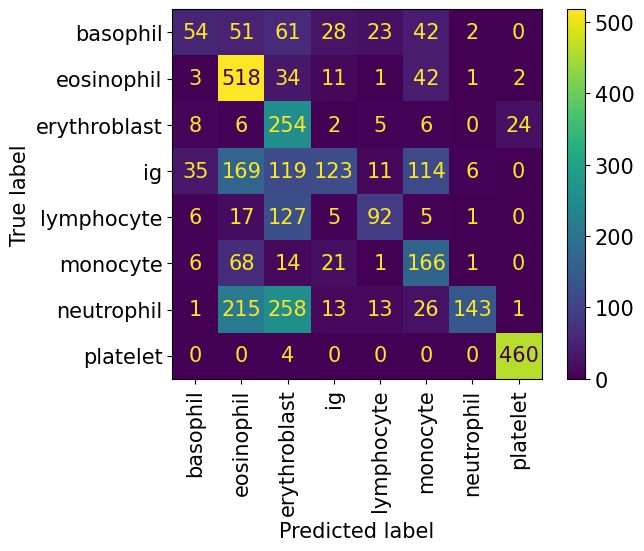

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=15)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, xticks_rotation='vertical')
plt.show()